# matplotlibで日本語を使う

* matplotlibはデフォルトでは日本語が表示できない
* windowsのフォントを利用するか、個別にフォントをインストールする必要がある

## 個別にフォントをインストールする

参考

matplotlibの日本語表示  
http://kaisk.hatenadiary.com/entry/2015/02/15/215831  

上記の補足（fontList.jsonについて）  
https://qiita.com/lascasM/items/7e226ee3a5c687eaf2d9

In [2]:
# matplotlibの所在確認
import site
import matplotlib

print("matplotlibの所在")
print(site.getsitepackages())

print("\n")

# matplotlibの設定ファイルの所在確認
print("matplotlibの設定ファイルの所在")
print(matplotlib.matplotlib_fname())

matplotlibの所在
['C:\\Users\\naohiroyoshida\\AppData\\Local\\Continuum\\anaconda3', 'C:\\Users\\naohiroyoshida\\AppData\\Local\\Continuum\\anaconda3\\lib\\site-packages']


matplotlibの設定ファイルの所在
C:\Users\naohiroyoshida\.matplotlib\matplotlibrc


#### ユーザー設定ファイルの作成
デフォルトの設定ファイルを書き変えるのを避けるため、上で確認したmatplotlibの設定ファイル（matplotlibrc）を、`C:\Users\naohiroyoshida\.matplotlib`にコピーする  
（ここに設定ファイルが存在する場合はこちらが優先的に読み込まれる）  
コピーした設定ファイル（ユーザー設定ファイル）に下記のようにインストールするフォントを追記
```
font.family : IPAGothic
```

#### フォントのインストール

上で確認したmatplotlibの所在フォルダ（下記）にインストールしたいフォントのttfファイルをコピーすればok  
matplotlibにインストールした場合は、matplotlibのアップデートなどで消える場合があるので注意  
その際は、再度下記フォルダにフォントファイルをコピーする

Continuum\anaconda3\lib\site-packages\matplotlib\mpl-data\fonts\ttf

#### フォントのキャッシュ削除

matplotlibは使うフォントのキャッシュを持っていて、それを削除しないと設定が読み込まれない。  
そのため、デフォルト設定ファイル、ユーザー設定ファイルの存在するフォルダにある、`fontList.cache`もしくは`fontList.py3k.cache`を削除する
※ファイルが存在しない場合は削除しなくてok

#### fontList.jsonの削除

このファイルはmatplotlibがmatplotlibのフォントディレクトリとシステムのフォントディレクトリをスキャンして自動生成している  
このため、新しいフォントをインストールした場合は、fontList.jsonがない状態でplotを実行して、新しくインストールしたフォントが認識されたfontList.jsonを生成する必要がある

In [3]:
# キャッシュファイルの所在確認
import matplotlib
from matplotlib import rc
print(matplotlib.get_cachedir())

C:\Users\naohiroyoshida\.matplotlib


In [4]:
# キャッシュファイルの削除
import os
#os.remove('C:\\Users\\naohiroyoshida\\.matplotlib\\fontList.cache')
#os.remove('C:\\Users\\naohiroyoshida\\.matplotlib\\fontList.py3k.cache')

Text(0.5,1,'豆腐 - TOFU')

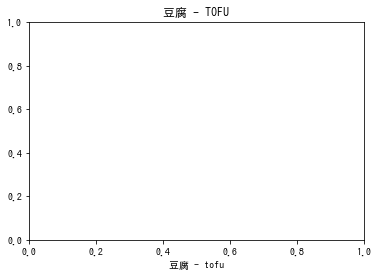

In [5]:
# 日本語のテスト
import matplotlib.pyplot as plt
%matplotlib inline

#plt.rcParams['font.family'] = 'IPAGothic'


plt.figure()
plt.xlabel('豆腐 - tofu')
plt.title('豆腐 - TOFU')

## windowsのフォントを使用する

参考  
https://takala.tokyo/takala_wp/2017/10/29/223/